<a href="https://colab.research.google.com/github/kerryqliu/stats170/blob/david/tfidftesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import nltk
import re
from sqlalchemy import create_engine
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
from sqlalchemy import create_engine

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
query2 = "SELECT * from fullDocuments f join documentLabels d on f.docid = d.docid;"
fulldocs = pd.read_sql_query(query2, con=engine)
fulldocs

,docid,fulltext,docid,caseid,label
0,1.0,Document Text: Example 1\nReferring Doctor: Un...,1,-1,1.0
1,2.0,Document Text: Example 2\nProgress Notes\nDate...,2,-1,1.0
2,3.0,Document Text: Example 3\nChief Complaint:\n1....,3,-1,4.0
3,4.0,Document Text: 14\nse\nLAIDA\n*\nPatient Infor...,4,11594,1.0
4,5.0,Document Text: The first set of documents behi...,5,11594,1.0
...,...,...,...,...,...
110,111.0,Document Text: 9:10\nFAX\n2002/041\n'\nPatient...,111,87832,1.0
111,112.0,Document Text: # 23/24\nfined VI\nvyy\nScan on...,112,88178,1.0
112,113.0,Document Text: 15:03 From\nPage: 1/24\nNUFACTO...,113,95139,1.0
113,114.0,Document Text: 03:58:42 p.m.\n1/2\nNU FACTOR\n...,114,95739,2.0


In [7]:
corpus = []
tags = []
for i, row in fulldocs.iterrows():
  corpus.append(row['fulltext'])
  tags.append(row['label'])

In [8]:
vectorizer2 = TfidfVectorizer(stop_words = stopwords.words('english'))
test_fulldocs = vectorizer2.fit_transform(corpus)

In [28]:
print(test_fulldocs)

  (0, 6342)	0.01870604463482593
  (0, 6605)	0.01641435389713952
  (0, 4383)	0.023247617356637783
  (0, 3028)	0.05274385616005545
  (0, 4024)	0.017183850143770486
  (0, 3094)	0.015141914360378653
  (0, 3059)	0.01870604463482593
  (0, 839)	0.061114998535660194
  (0, 5675)	0.014237330842734245
  (0, 8244)	0.02463731029590029
  (0, 1420)	0.03678100348951477
  (0, 5302)	0.03678100348951477
  (0, 2533)	0.04167780786744137
  (0, 1668)	0.061114998535660194
  (0, 10149)	0.08105349258596664
  (0, 4742)	0.04131637628289729
  (0, 5848)	0.019642715864715877
  (0, 4422)	0.026548182491647126
  (0, 9730)	0.04052674629298332
  (0, 6712)	0.05004895024304613
  (0, 8142)	0.028409861113910015
  (0, 10373)	0.05274385616005545
  (0, 4312)	0.025877065088511623
  (0, 7600)	0.061114998535660194
  (0, 7170)	0.04052674629298332
  :	:
  (114, 7590)	0.02966434220921661
  (114, 8787)	0.02213220380391751
  (114, 3563)	0.04831181257034183
  (114, 3820)	0.012077953142585458
  (114, 9847)	0.019277167658818557
  (114, 20

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [11]:
svd = TruncatedSVD(n_components=2).fit(test_fulldocs)
reduced = svd.transform(test_fulldocs)

In [15]:
colormapping = {0.0: "#7F59FF", 1.0: "green", 2.0: "red", 3.0: "black", 4.0: "black"}
legend = {0.0: "Unrelated", 1.0: "Reduced", 2.0: "Normal", 3.0: "Increased Legs", 4.0: "Increased Arms/Legs"}

In [12]:
unrelated = []
low = []
normal = []
high = []
for index, instance in enumerate(reduced):
  pca_comp_1, pca_comp_2 = reduced[index]
  if (tags[index] == 0.0):
    unrelated.append([pca_comp_1, pca_comp_2])
  elif (tags[index] == 1.0):
    low.append([pca_comp_1, pca_comp_2])
  elif (tags[index] == 2.0):
    normal.append([pca_comp_1, pca_comp_2])
  else:
    high.append([pca_comp_1, pca_comp_2])

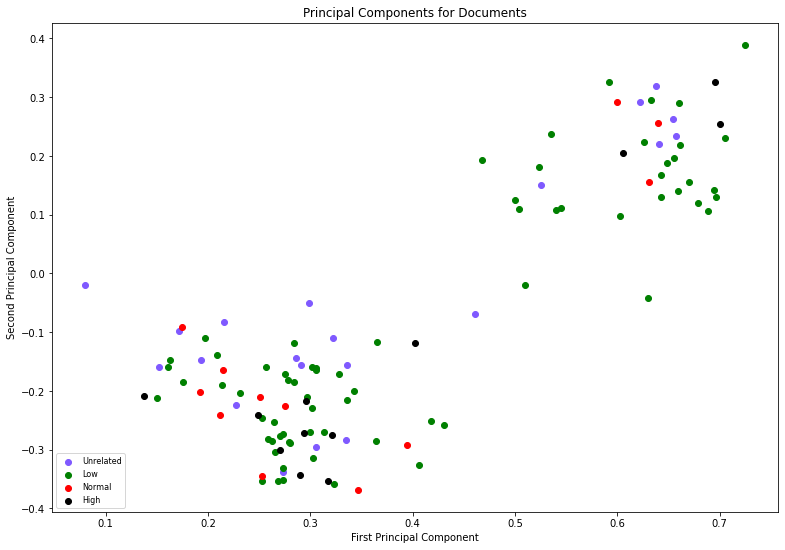

In [16]:
fig, ax = plt.subplots(figsize=(13,9))

unrelated_plt = plt.scatter([i[0] for i in unrelated], [i[1] for i in unrelated], color = colormapping[0.0])
low_plt = plt.scatter([i[0] for i in low], [i[1] for i in low], color = colormapping[1.0])
normal_plt = plt.scatter([i[0] for i in normal], [i[1] for i in normal], color = colormapping[2.0])
high_plt = plt.scatter([i[0] for i in high], [i[1] for i in high], color = colormapping[3.0])

plt.title("Principal Components for Documents")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend((unrelated_plt, low_plt, normal_plt, high_plt),
           ('Unrelated', 'Low', 'Normal', 'High'),
           scatterpoints=1,
           loc='lower left',
           fontsize=8)
plt.show()

Tf-Idf & NB Model

In [55]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(corpus, tags, test_size=0.1, random_state=10)

In [57]:
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')

In [58]:
features_train = vectorizer.fit_transform(features_train)
features_test = vectorizer.transform(features_test)

In [40]:
from sklearn.feature_selection import SelectPercentile, f_classif
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(features_train, labels_train)
features_train = selector.transform(features_train).toarray()
features_test = selector.transform(features_test).toarray()

In [41]:
from sklearn.naive_bayes import GaussianNB
from time import time
t0 = time()
model = GaussianNB()
model.fit(features_train, labels_train)
print(f"\nTraining time: {round(time()-t0, 3)}s")
t0 = time()
score_train = model.score(features_train, labels_train)
print(f"Prediction time (train): {round(time()-t0, 3)}s")
t0 = time()
score_test = model.score(features_test, labels_test)
print(f"Prediction time (test): {round(time()-t0, 3)}s")
print("\nTrain set score:", score_train)
print("Test set score:", score_test)


Training time: 0.006s
Prediction time (train): 0.005s
Prediction time (test): 0.001s

Train set score: 0.9514563106796117
Test set score: 0.3333333333333333


Tf-Idf with Bigrams

In [47]:
features_train2, features_test2, labels_train2, labels_test2 = train_test_split(corpus, tags, test_size=0.1, random_state=10)

In [48]:
vectorizer2 = TfidfVectorizer(stop_words='english', ngram_range = (1,2))
features_train2 = vectorizer2.fit_transform(features_train2)
features_test2 = vectorizer2.transform(features_test2)

In [53]:
print(vectorizer2.get_feature_names())

['00', '00 00', '00 012', '00 100', '00 162', '00 201123403303133', '00 24', '00 30', '00 357', '00 36', '00 368', '00 62', '00 64', '00 69', '00 6yrs', '00 723', '00 77', '00 780', '00 922', '00 aspirin', '00 celecoxib', '00 cetirizine', '00 csf', '00 dl', '00 elia', '00 ella', '00 heb', '00 icd', '00 id', '00 janumet', '00 lambert', '00 love', '00 neuralgic', '00 neuropathy', '00 ng', '00 niaspan', '00 nufactor', '00 patient', '00 pm', '00 pramipexole', '00 printed', '00 reason', '00 result', '00 sensory', '00 social', '00 ul', '00 vitals', '00 weights', '000', '000 000', '000 10', '000 15', '000 30', '000 800', '000 capsule', '000 directed', '000 international', '000 mcg', '000 mg', '000 mouth', '000 negative', '000 oko', '000 ontsqpg', '000 oral', '000 positive', '000 topical', '000 unit', '000 units', '000 xxx', '000000', '000000 lb', '000000 weight', '00000000', '00000000 13', '0000000000', '0000000000 page', '0001', '0001 0005', '0002', '0002 0003', '0002 0005', '0002 0022', '00

In [49]:
selector2 = SelectPercentile(f_classif, percentile=10)
selector2.fit(features_train2, labels_train)
features_train2 = selector2.transform(features_train2).toarray()
features_test2 = selector2.transform(features_test2).toarray()

In [50]:
t0 = time()
model2 = GaussianNB()
model2.fit(features_train2, labels_train2)
print(f"\nTraining time: {round(time()-t0, 3)}s")
t0 = time()
score_train2 = model2.score(features_train2, labels_train2)
print(f"Prediction time (train): {round(time()-t0, 3)}s")
t0 = time()
score_test2 = model2.score(features_test2, labels_test2)
print(f"Prediction time (test): {round(time()-t0, 3)}s")
print("\nTrain set score:", score_train2)
print("Test set score:", score_test2)


Training time: 0.022s
Prediction time (train): 0.026s
Prediction time (test): 0.005s

Train set score: 0.9902912621359223
Test set score: 0.3333333333333333
